# Identificación de Patrones, Tendencias y Anomalías

### Importación de Librerías y Conexión a la base de datos

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from adjustText import adjust_text

# Conexión a la base de datos de postgres
usuario = "postgres"
contrasena = "postgres"
base_datos = "db_ecommerce"
direccion = "localhost"
puerto = "5432"

conexion = create_engine(f'postgresql+pg8000://{usuario}:{contrasena}@{direccion}:{puerto}/{base_datos}')

#### Gráfico de Venta por Categoría

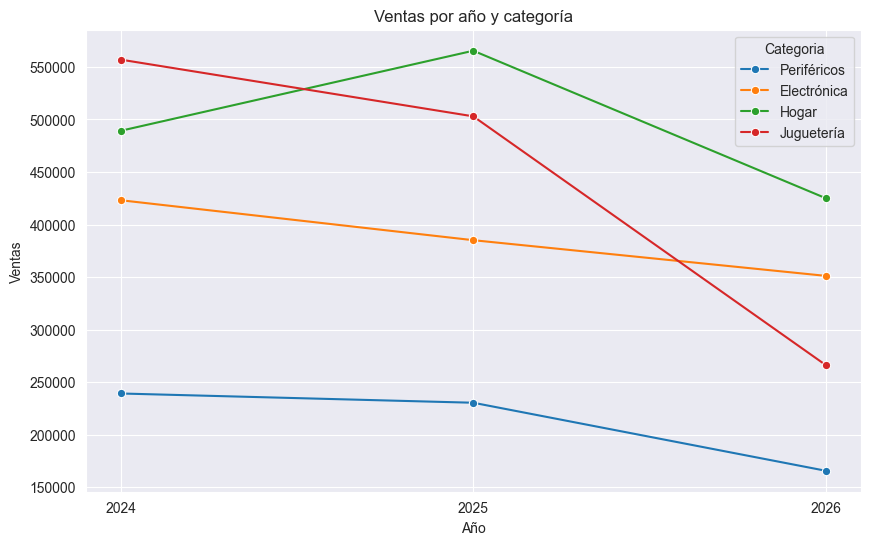

In [5]:
sqlcategoriaventa = """select date_part('year',d.fechaventa) año
	   ,c.nombrecategoria
	   ,sum(a.totalventa) total_ventas
from dbo.detallesventa a
left join dbo.productos b on (a.productoid = b.productoid)
left join dbo.categorias c on (b.categoriaid = c.categoriaid)
left join dbo.ventas d on (a.ventasid = d.ventasid)
group by date_part('year',d.fechaventa)
		 ,c.nombrecategoria
"""

df_catventas = pd.read_sql_query(sqlcategoriaventa,conexion)

# Configuración para visualizar los gráficos
plt.figure(figsize=(10, 6))

# Representación Lineal de las ventas por categoría
sns.lineplot(data=df_catventas, x='año', y='total_ventas', hue='nombrecategoria', marker='o',legend = 'auto')

# Cuadricula, títulos y etiquetas
sns.set_style("darkgrid")
plt.title('Ventas por año y categoría')
plt.xlabel ('Año')
plt.ylabel('Ventas')
plt.legend(title='Categoria')
# Se colocan números enteros en el eje x
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Mostar el gráfico
plt.show()


##### Con este grafico podemos tener un panorama de la tendencia de la venta por cada categoría, mostrando que Hogar es la única categoría que refleja un crecimiento en las ventas de 2024 a 2025, mientras que electrónica, juguetería y periféricos muestran un descenso en el mismo periodo. Cabe mencionar que entre 2025 y 2026 todas las categorías tienden a la baja en las ventas.

#### Gráfico de Unidades Vendidas por Categoría

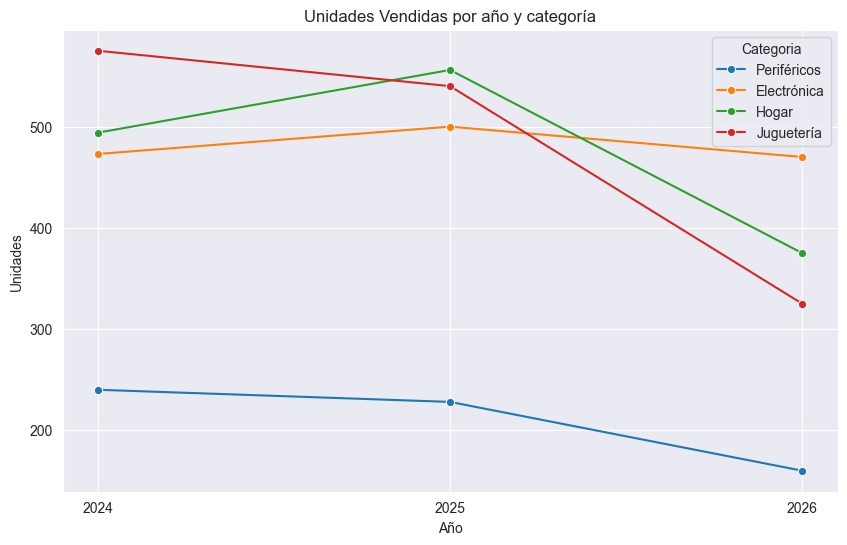

In [6]:
sqlcategoriaunidades = """select date_part('year',d.fechaventa) año
	   ,c.nombrecategoria
	   ,sum(a.cantidad) unidades_vendidas
from dbo.detallesventa a
left join dbo.productos b on (a.productoid = b.productoid)
left join dbo.categorias c on (b.categoriaid = c.categoriaid)
left join dbo.ventas d on (a.ventasid = d.ventasid)
group by date_part('year',d.fechaventa)
		 ,c.nombrecategoria
"""

df_catunidades = pd.read_sql_query(sqlcategoriaunidades,conexion)

# Configuración para visualizar los gráficos
plt.figure(figsize=(10, 6))

# Representación Lineal de las ventas por categoría
sns.lineplot(data=df_catunidades, x='año', y='unidades_vendidas', hue='nombrecategoria', marker='o',legend = 'auto')

# Cuadricula, títulos y etiquetas
sns.set_style("darkgrid")
plt.title('Unidades Vendidas por año y categoría')
plt.xlabel ('Año')
plt.ylabel('Unidades')
plt.legend(title='Categoria')
# Se colocan números enteros en el eje x
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Mostar el gráfico
plt.show()

##### Este gráfico nos ayuda a observar el comportamiento de la venta por unidades de cada categoría, mostrando que Hogar y Electrónica han tenido un crecimiento aceptable de 2024 a 2025, mientras que juguetería y periféricos muestran un descenso en las ventas en el mismo periodo. Cabe mencionar que entre 2025 y 2026 todas las categorías reflejan un descenso en las ventas, sin embargo, ese fenómeno se puede deber a que la data de 2026 no está completa, a diferencia de los 2 años anteriores.

#### Gráfico de Venta por Región

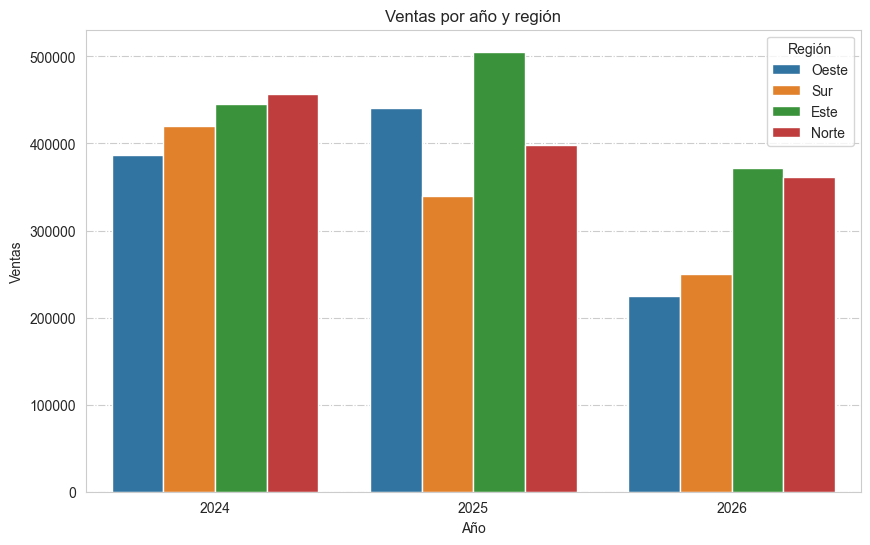

In [7]:
sqlregionventas = """select date_part('year',b.fechaventa) año
	   ,c.nombreregion
	   ,sum(a.totalventa) total_ventas
from dbo.detallesventa a
left join dbo.ventas b on (a.ventasid = b.ventasid)
left join dbo.regiones c on (b.regionid = c.regionid)
group by date_part('year',b.fechaventa)
		 ,c.nombreregion
"""

df_regionventas = pd.read_sql_query(sqlregionventas,conexion)

# Asegúrate de que 'año' sea un entero
df_regionventas['año'] = df_regionventas['año'].astype(int)


# Configuración para visualizar los gráficos
plt.figure(figsize=(10,6))

# Cuadrícula
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

# Representación de barras de las ventas por región
sns.barplot(data=df_regionventas,x="año",y="total_ventas",hue="nombreregion")

# Se colocan números enteros en el eje x
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Títulos y etiquetas
plt.title('Ventas por año y región')
plt.xlabel ('Año')
plt.ylabel('Ventas')
plt.legend(title='Región')

# Mostrar el gráfico
plt.show()

##### El grafico de ventas por región nos permite ver que en las regiones Oeste y Este se da el mayor crecimiento en las ventas, siendo la región Este la de mayor poder adquisitivo. En las estrategias de la compañía podría estar evaluar campañas de marketing para incentivar al comprador de la región sur, que es la que tiene la baja más sensible, lo mismo con la zona norte. Cabe señalar que, si la tendencia se mantiene, 2026 podría terminar dando marcados descensos en las ventas en todas las regiones.

#### Gráfico de Unidades Vendidas por Región

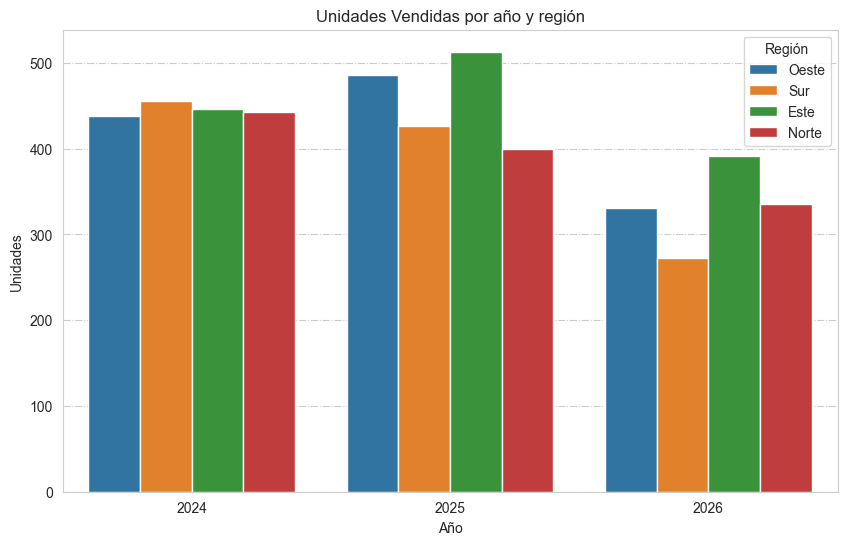

In [8]:
sqlregionunidades = """select date_part('year',b.fechaventa) año
	   ,c.nombreregion
	   ,sum(a.cantidad) unidades_vendidas
from dbo.detallesventa a
left join dbo.ventas b on (a.ventasid = b.ventasid)
left join dbo.regiones c on (b.regionid = c.regionid)
group by date_part('year',b.fechaventa)
		 ,c.nombreregion
"""

df_regionunidades = pd.read_sql_query(sqlregionunidades,conexion) 

df_regionunidades['año'] = df_regionunidades['año'].astype(int)

# Configuración para visualizar los gráficos
plt.figure(figsize=(10,6))

# Cuadrícula
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

# Representación de barras de las ventas por región
sns.barplot(data=df_regionunidades,x="año",y="unidades_vendidas",hue="nombreregion")

# Se colocan números enteros en el eje x
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Títulos y etiquetas
plt.title('Unidades Vendidas por año y región')
plt.xlabel ('Año')
plt.ylabel('Unidades')
plt.legend(title='Región')

# Mostrar el gráfico
plt.show()

##### Continuando con el análisis por región, en el gráfico de unidades vendidas por región podemos apreciar en qué regiones se ha concentrado la venta, reafirmando que la región Este es la zona con más ventas, seguida de la zona Oeste. Una sugerencia podría ser el considerar tener más inventario para las regiones Este y Oeste para mantener el nivel de ventas, mientras que para las regiones Norte y Sur se podrían implementar estrategias de atracción de clientes que posicionen mejor a la compañía y por ende las ventas incrementen.

#### Gráfico de la Frecuencia de Compras de los Clientes y la Venta - Año: 2024

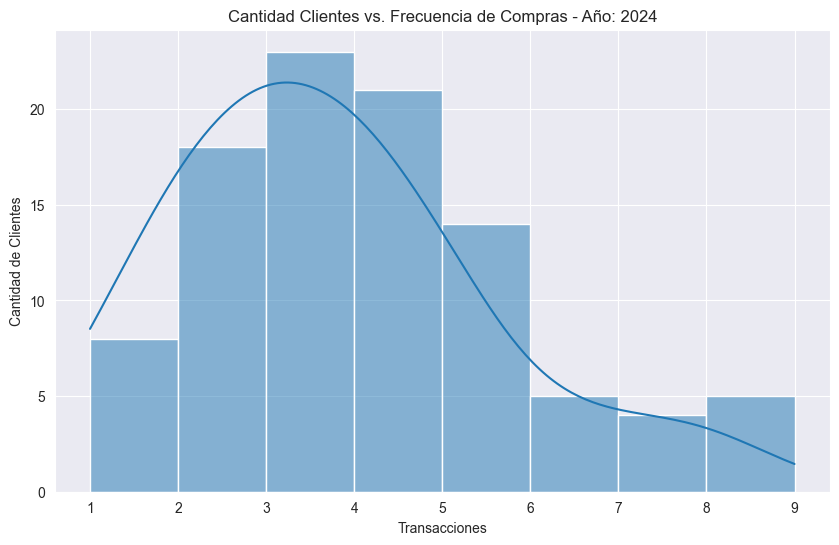

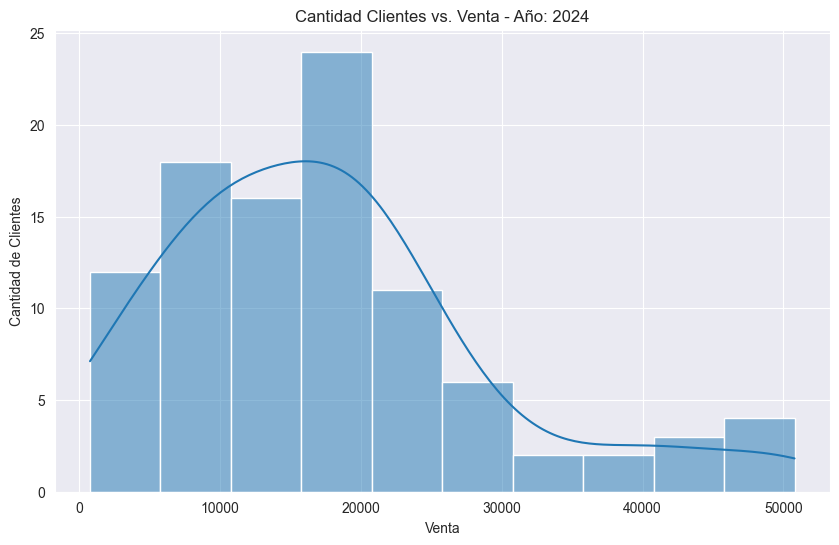

In [9]:
sqlclientes2024 = """select date_part('year',b.fechaventa) año
	  ,c.nombrecliente
	  ,count(b.fechaventa) compras_por_año
	  ,sum(a.totalventa) total_ventas
from dbo.detallesventa a
left join dbo.ventas b on (a.ventasid = b.ventasid)
left join dbo.clientes c on (b.clienteid = c.clienteid)
where date_part('year',b.fechaventa) = 2024	
group by date_part('year',b.fechaventa)		
	    ,c.nombrecliente
"""

df_clientes1 = pd.read_sql_query(sqlclientes2024,conexion)

# Configuración para visualizar los gráficos
plt.figure(figsize=(10, 6))

# Cuadricula
sns.set_style("darkgrid")

# Histograma con la frecuencia de compras de los clientes - Año: 2024
sns.histplot(data=df_clientes1, x='compras_por_año', bins="auto", kde=True)

# Títulos y etiquetas
plt.xlabel('Transacciones')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad Clientes vs. Frecuencia de Compras - Año: 2024')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Configuración para visualizar los gráficos
plt.figure(figsize=(10, 6))

# Cuadricula
sns.set_style("darkgrid")

# Histograma con la venta de los clientes - Año: 2024
sns.histplot(data=df_clientes1, x='total_ventas', bins="auto", kde=True)

# Títulos y etiquetas
plt.xlabel('Venta')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad Clientes vs. Venta - Año: 2024')
plt.grid(True)

# Mostrar el gráfico
plt.show()

##### Entramos al análisis del comportamiento de los clientes, comenzando con el año 2024. Los graficos generados nos indican que la mayoría de clientes compran de 1 a 5 veces, en transacciones que generan ventas acumuladas de hasta $20,000. Para montos mayores se presentan menos compradores, que podrían catalogarse como clientes frecuentes con más de 5 tickets en el año dando ventas acumuladas de más de $50,000

#### Gráfico de la Frecuencia de Compras de los Clientes y la Venta - Año: 2025

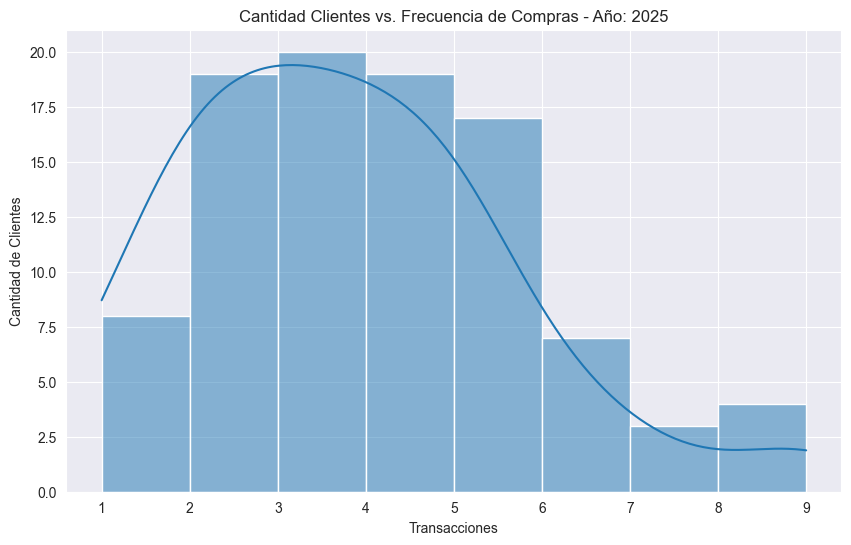

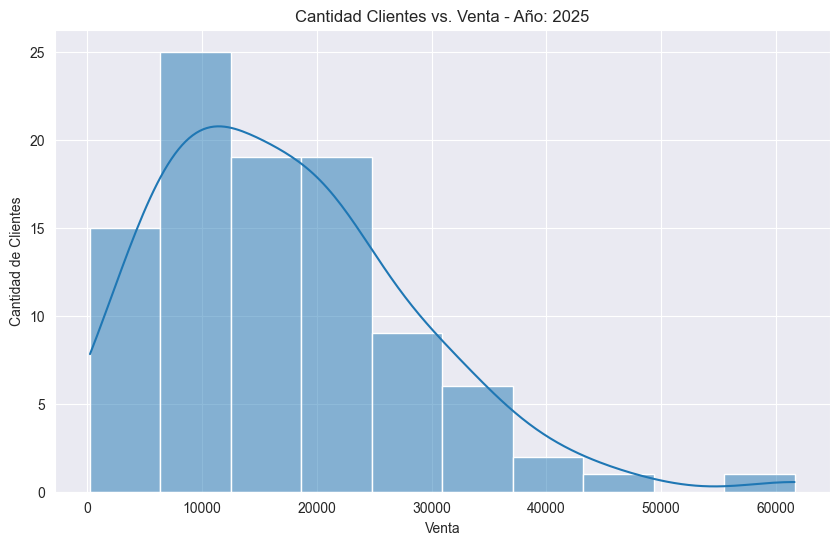

In [10]:
sqlclientes2025 = """select date_part('year',b.fechaventa) año
	  ,c.nombrecliente
	  ,count(b.fechaventa) compras_por_año
	  ,sum(a.totalventa) total_ventas
from dbo.detallesventa a
left join dbo.ventas b on (a.ventasid = b.ventasid)
left join dbo.clientes c on (b.clienteid = c.clienteid)
where date_part('year',b.fechaventa) = 2025	
group by date_part('year',b.fechaventa)		
	    ,c.nombrecliente
"""

df_clientes2 = pd.read_sql_query(sqlclientes2025,conexion)
# Configuración para visualizar los gráficos
plt.figure(figsize=(10, 6))

# Cuadrícula
sns.set_style("darkgrid")

# Histograma con la frecuencia de compras de los clientes - Año: 2025
sns.histplot(data=df_clientes2, x='compras_por_año', bins="auto", kde=True)

# Títulos y etiquetas
plt.xlabel('Transacciones')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad Clientes vs. Frecuencia de Compras - Año: 2025')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Configuración para visualizar los gráficos
plt.figure(figsize=(10, 6))

# Cuadrícula
sns.set_style("darkgrid")

# Histograma con la venta de los clientes - Año: 2025
sns.histplot(data=df_clientes2, x='total_ventas', bins="auto", kde=True)

# Títulos y etiquetas
plt.xlabel('Venta')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad Clientes vs. Venta - Año: 2025')
plt.grid(True)

# Mostrar el gráfico
plt.show()

##### En el año 2025 el comportamiento de los clientes mantiene la tendencia de 1 a 5 eventos de compra, dando una media de venta acumuladas de $10,000, con un máximo de hasta $25,000. Para montos mayores se presentan menos clientes, que como mencionamos anteriormente pueden ser clientes frecuentes que alcanzan montos acumulados de más de $60,000, pero con un gap en la zona cercana a los $50,000 y $55,000. En general da un leve incremento en el ingreso por ventas en comparación al 2024.

#### Gráfico de dispersion top de productos mas vendidos por año

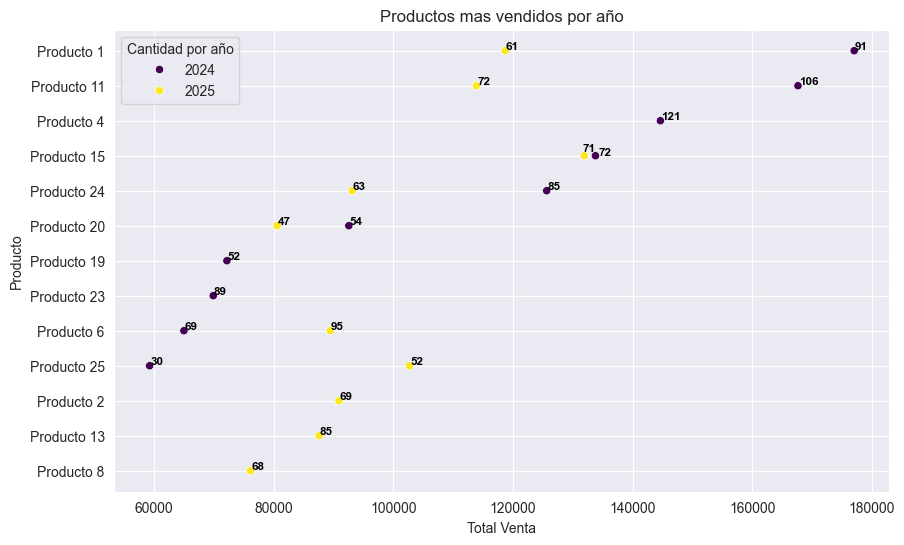

In [11]:
sqlproductos = """
					WITH ventas_agrupadas AS (
    					SELECT date_part('year', b.fechaventa) AS año,
           					c.nombreproducto,
           					count(b.ventasid) AS tickets,
           					sum(a.cantidad) AS cantidad,
           					coalesce(sum(a.totalventa), 0) AS total_ventas
    					FROM dbo.detallesventa a
    					LEFT JOIN dbo.ventas b ON (a.ventasid = b.ventasid)
    					LEFT JOIN dbo.productos c ON (a.productoid = c.productoid)
    					GROUP BY date_part('year', b.fechaventa), c.nombreproducto
					)
					SELECT *
					FROM (
    						SELECT *,
           						ROW_NUMBER() OVER (PARTITION BY año ORDER BY total_ventas DESC) AS rn
    						FROM ventas_agrupadas
						) subquery
					WHERE  año <> 2026 AND rn <= 10
					ORDER BY año, total_ventas DESC
"""

df_productos1 = pd.read_sql_query(sqlproductos,conexion)

df_productos1['año'] = df_productos1['año'].astype(int)

# Configuración para visualizar los gráficos
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con la cantidad de productos vendidos - Año: 2024
ploteo = sns.scatterplot(data=df_productos1, x='total_ventas', y='nombreproducto', hue='año', palette='viridis')

# Agregar etiquetas a cada punto para mostrar la cantidad
texts = []
for line in range(0, df_productos1.shape[0]):
    texts.append(plt.text(df_productos1.total_ventas[line], df_productos1.nombreproducto[line], 
                          df_productos1.cantidad[line], horizontalalignment='left', 
                          size='small', color='black', weight='semibold'))

# Ajustar las etiquetas para evitar superposición
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Cambiar el título de la leyenda
ploteo.legend(title='Cantidad por año')

# Títulos y etiquetas
plt.xlabel('Total Venta')
plt.ylabel('Producto')
plt.title('Productos mas vendidos por año')
plt.grid(True)
plt.show()


##### Este grafico de dispersión nos muestra los productos estrella de la empresa, mostrando su desempeño de ventas en los 2 años, hay productos que tienen facturación en ambos años y tienen un crecimiento notorio como los productos 6 y 25, con productos como el 2 y 13 que aparecen en el top de 2025. Sin embargo, los productos 1, 11, 20 y 24 tienen una gran caída en su demanda. Esto sugiere revisar que está ocurriendo en los gustos de los clientes respecto a esos productos o si deben ser incluidos en campañas de promoción para incentivar su venta.

### Grafico de tendencia de ventas mensual por año

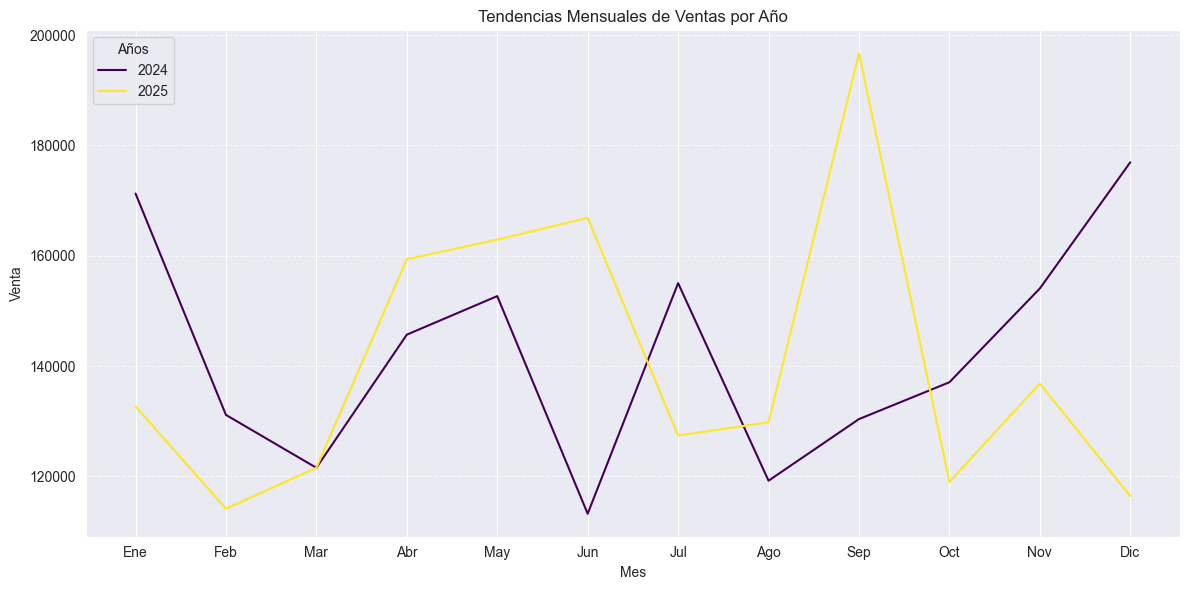

In [12]:
sqltendenciaventas = """
					SELECT date_part('year', b.fechaventa) AS año,
                        date_part('month', b.fechaventa) AS mes,
                        coalesce(sum(a.totalventa), 0) AS total_ventas
                    FROM dbo.detallesventa a
                    LEFT JOIN dbo.ventas b ON (a.ventasid = b.ventasid)
                    LEFT JOIN dbo.productos c ON (a.productoid = c.productoid) 
                    WHERE date_part('year', b.fechaventa) <> 2026 
                    GROUP BY date_part('year', b.fechaventa), date_part('month', b.fechaventa)
"""

df_ventas_2 = pd.read_sql_query(sqltendenciaventas,conexion) 

df_ventas_2['año'] = df_ventas_2['año'].astype(int)

df_ventas_2['mes'] = df_ventas_2['mes'].astype(int)

# Crear un gráfico de líneas para las tendencias mensuales por año
plt.figure(figsize=(12, 6))

# Gráfico de líneas con las tendencias mensuales por año
ploteo = sns.lineplot(data=df_ventas_2, x='mes', y='total_ventas', hue='año', palette='viridis')

# Títulos y etiquetas
plt.title('Tendencias Mensuales de Ventas por Año')
plt.xlabel('Mes')
plt.ylabel('Venta')
plt.xticks(ticks=range(1, 13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])

# Cambiar el título de la leyenda
ploteo.legend(title='Años', loc='upper left')

# Mostrar la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##### Este grafico nos da una idea de cómo se mueven las ventas a lo largo de los meses, indicándonos que existen picos de ventas y puntos donde la venta cae de manera critica. Esto lo estudiaremos de mejor manera con el mapa de calor que viene a continuación.

### Mapa de calor de ventas

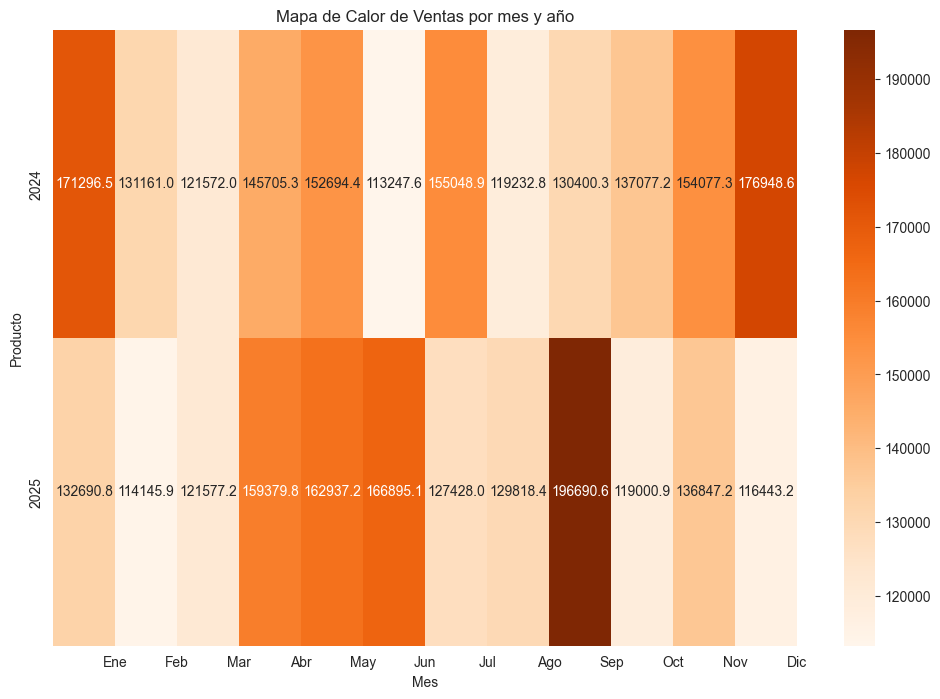

In [13]:
sqlventas = """
					SELECT date_part('year', b.fechaventa) AS año,
                        date_part('month', b.fechaventa) AS mes,
                        coalesce(sum(a.totalventa), 0) AS total_ventas
                    FROM dbo.detallesventa a
                    LEFT JOIN dbo.ventas b ON (a.ventasid = b.ventasid)
                    LEFT JOIN dbo.productos c ON (a.productoid = c.productoid) 
                    WHERE date_part('year', b.fechaventa) <> 2026 
                    GROUP BY date_part('year', b.fechaventa), date_part('month', b.fechaventa)
"""

df_ventas = pd.read_sql_query(sqlventas,conexion)

df_ventas['año'] = df_ventas['año'].astype(int) 

df_ventas['mes'] = df_ventas['mes'].astype(int) 

# Pivotar los datos para que los productos sean las filas y los meses sean las columnas
df_pivot = df_ventas.pivot_table(index='año', columns='mes', values='total_ventas', aggfunc='sum')

# Rellenar los valores NaN con 0
df_pivot = df_pivot.fillna(0)

# Configuración para visualizar los gráficos
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap='Oranges')

plt.xticks(ticks=range(1, 13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])

# Títulos y etiquetas
plt.title('Mapa de Calor de Ventas por mes y año')
plt.xlabel('Mes')
plt.ylabel('Producto')

# Mostrar el gráfico
plt.show()


##### Con el mapa de calor se puede observar una tendencia al crecimiento en las ventas en los meses de abril a junio de 2025 respecto al año pasado además de un pico de ventas en septiembre para luego un descenso abrupto en octubre que se mantiene hasta diciembre.